<a href="https://colab.research.google.com/github/RafaelAnga/Bootcamp_AI_BIT/blob/main/S2_C5_RDG_Marketing_target_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Implementing RGD

## Activity 1: Import Necessary Libraries

In [ ]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas


In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Bootcamp AI/DataSetClean')

#mostar lista de archivos
os.listdir()

['marketing_extract_2X_Income.xlsx']

## Activity 2: Load and Explore the Dataset

In [ ]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


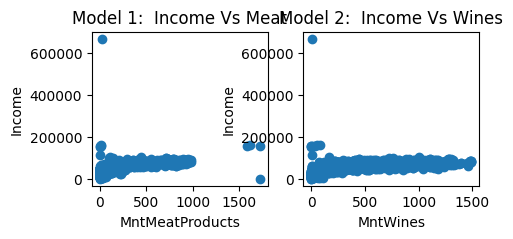

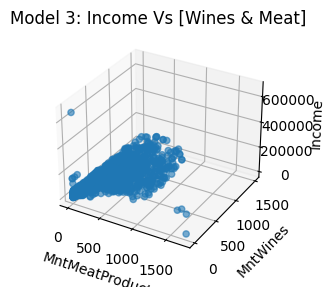

In [ ]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('Model 1:  Income Vs Meat')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')


plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('Model 2:  Income Vs Wines')
plt.xlabel('MntWines')
plt.ylabel('Income')

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MntMeatProducts'],df['MntWines'],df['Income'], alpha = 0.6)
ax.set_xlabel('MntMeatProducts')
ax.set_ylabel('MntWines')
ax.set_zlabel('Income')
ax.set_title('Model 3: Income Vs [Wines & Meat]')
plt.show()

## Activity 3: Preprocess Data

In [ ]:
# --- >  Eliminar datos átipicos de Income
#---------------------------------------
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntMeatProducts
#---------------------------------------
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntWines
#---------------------------------------
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

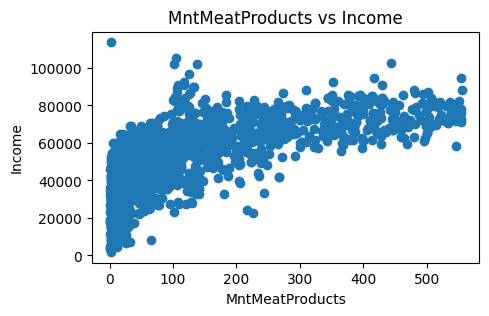

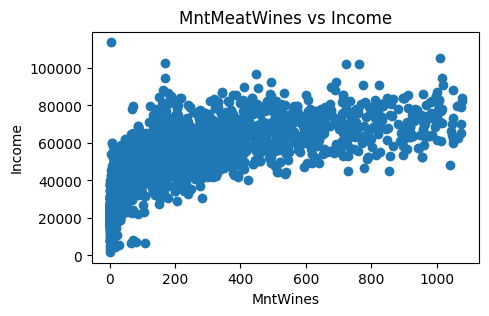

In [ ]:

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

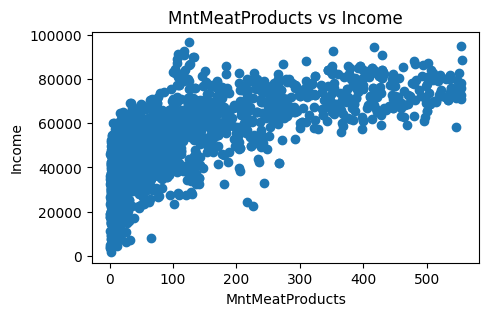

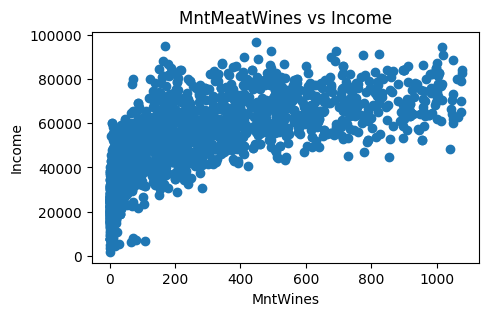

In [ ]:
df = df[df['Income']< 100000]

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# 2. Inicialización de parámetros

# Activity 3: Implement a Gradient Descent Regression Iteration

In [ ]:
theta = 80
intercept = 5000

In [ ]:
# y = b + mX
# h = b + Theta(X1)
# h = theta_0 + theta_1(X1)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts']

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

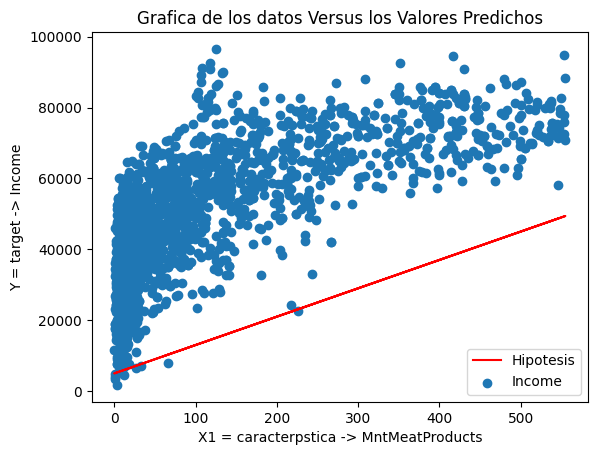

In [ ]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = caracterpstica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule el error cuadratico medio MSE = cost = lost
# MSE = ((h-y)^2)/m
h = df['Hipotesis']
Y = df['Income']
X1 = df['MntMeatProducts']
m = len(df)
MSE = np.mean((h-Y)**2)
MSE = print( f'El error cuadratico medio es: {round(MSE,2)}')

El error cuadratico medio es: 1365248812.66


In [ ]:
# Actualice los parámetros
theta_0 = intercept
theta_1 = theta
alpha = 0.0001 # Este valor entre 0 y 1

In [ ]:
theta_0

5000

In [ ]:
# Actualización de theta_0
theta_0 = theta_0 - alpha * (2/m) * np.sum((h-Y))
theta_0

5006.875806278481

In [ ]:
theta_1

80

In [ ]:
# Actualización de theta_1
theta_1 = theta_1 - alpha * (2/m) * np.dot(X1.T,(h-Y))
theta_1

931.7064279493671

In [ ]:
# Visualice la nueva recta

In [ ]:
H_new = theta_0 + theta_1 * X1

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

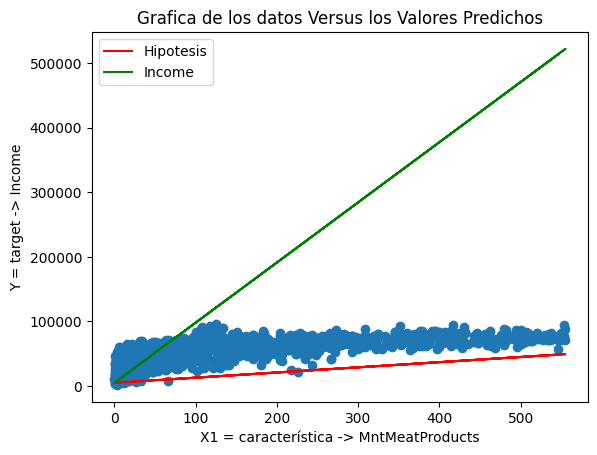

In [ ]:

plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.plot(df['MntMeatProducts'],H_new,color='green')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule la bondad de ajuste
SSE = np.sum((H_new-Y)**2)
Y_mean = np.mean(Y)
SST = np.sum((Y-Y_mean)**2)
R2 = 1 - (SSE/SST)
R2

-46.011471492207995

In [ ]:
theta = np.random.randn(2,1)

# Actividad 4. Implement a Gradient Descent Regression function

In [ ]:
from statsmodels.tools.tools import add_constant

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
# Hiperparámetro
alpha = 0.0001
n_iteraciones = 100

## Activity 5.1: Define Cost Function

In [ ]:
def cost_function(H,Y):
  #MSE = np.mean((h-Y)**2)
  # np.mean : calcula media aritmética de los elemntos
  cost = np.mean((H-Y)**2)
  return cost

In [ ]:
# Esta función no está terminada se terminará en la siguiente clase
# Inicializar parámetros
def my_RGD(Y,X1,alpha,n_iteraciones):
  theta = np.random.randn(2,1)
  #H = theta_0*(1) + theta_1*X1

  # La constante es necesaria para la multiplicacion del vector de parametros con la matriz de las caracteristicas
  X1 = add_constant(X1)

  #Convirtiendo a un array - vector columna (m,1)
  Y = np.reshape(Y,(-1,1))

  cost_history = np.zeros(n_iteraciones)

  for i in range(n_iteraciones):
    #H = theta_0*(1) + theta_1*X1
    H = np.dot(X1,theta)

    #Calculo de costo
    cost = cost_function(H,Y)

    # Guarda los valores en la iteracion i-esima
    cost_history[i] = cost_function(H,Y)

    #Actualizacion de parametros
    # alpha es la razon de aprendizaje y regula es salto
    theta = theta - alpha * (2/m) * np.dot(X1.T,(H-Y))

  return theta, cost_history


# Activity 6: Initialize Parameters and Run

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

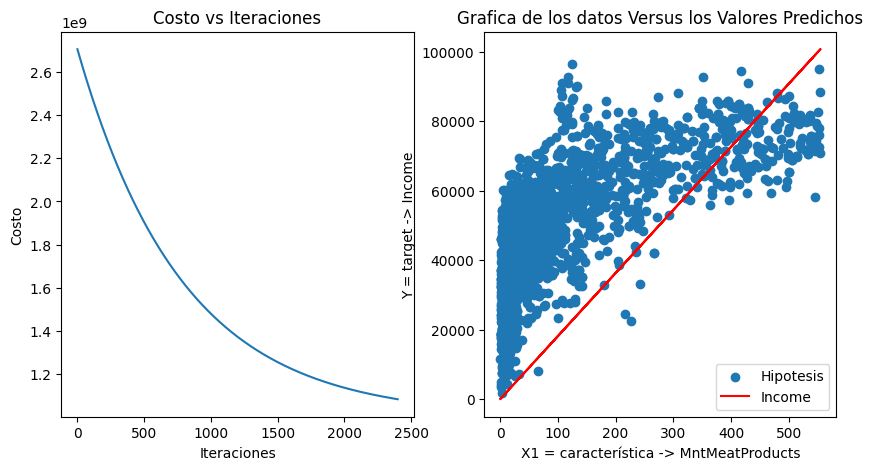

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
# Hiperparámetro
alpha = 0.00000001
n_iteraciones = 2400

theta_final,  cost_history = my_RGD(Y, X1, alpha, n_iteraciones)

#prediccion con parametros finales
H_final = theta_final[0] + theta_final[1] * X1
theta_final

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot( cost_history)
plt.title('Costo vs Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

plt.subplot(1,2,2)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.plot(df['MntMeatProducts'],H_final,color='red')
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')


Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

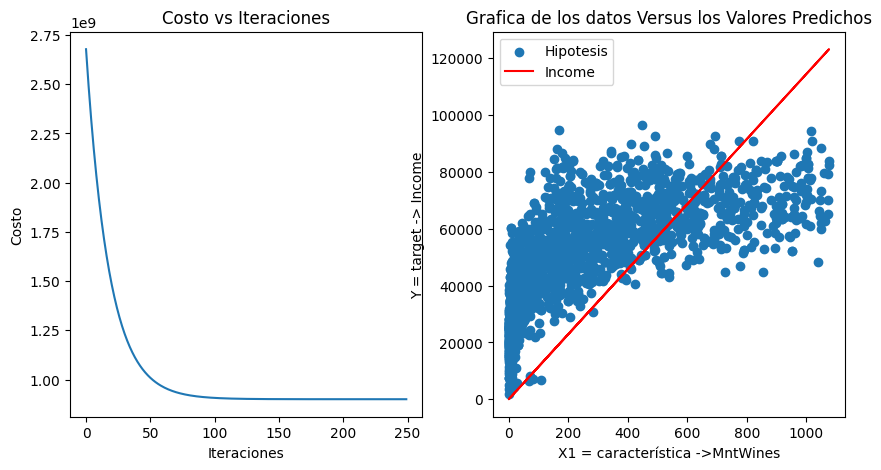

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntWines']
# Hiperparámetro
alpha = 0.0000001
n_iteraciones = 250

theta_final,  cost_hys = my_RGD(Y, X1, alpha, n_iteraciones)

#prediccion con parametros finales
H_final = theta_final[0] + theta_final[1] * X1
theta_final

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot( cost_hys)
plt.title('Costo vs Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.plot(df['MntWines'],H_final,color='red')
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica ->MntWines')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
def my_RGD_poly(Y,X1,alpha,n_iteraciones):
  #Hacemos 3 parametros para iniciar el model Theta 0 , Theta 1 y theta 2
  theta = np.random.randn(3,1)
  #H = theta_0*(1) + theta_1*X1 + (theta_2*X1)^2

  # La constante es necesaria para la multiplicacion del vector de parametros con la matriz de las caracteristicas
  #np.c_ -> concatena los elementos en los brackets
  X1 = np.c_[X1,X1**2]
  X1 = add_constant(X1)

  #Convirtiendo a un array - vector columna (m,1)
  Y = np.reshape(Y,(-1,1))

  #Llenar el costo history con zeros para inicializar
  cost_history = np.zeros(n_iteraciones)

  for i in range(n_iteraciones):
    H = np.dot(X1,theta)

    #Calculo de costo
    cost = cost_function(H,Y)

    # Guarda los valores en la iteracion i-esima
    cost_history[i] = cost

    #Actualizacion de parametros
    # alpha es la razon de aprendizaje y regula es salto
    theta = theta - alpha * (2/m) * np.dot(X1.T,(H-Y))

  return theta, cost_history

# Manual fix of the data -> we need to change the iterations and the alpha

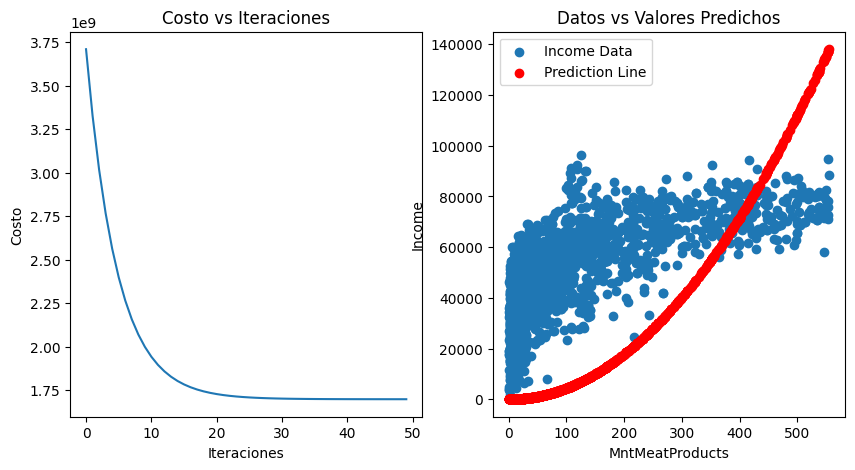

In [ ]:

Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
#X1_scaled = (X1 - X1.min()) / (X1.max() - X1.min())


# Hiperparámetro
alpha = 0.00000000001
n_iteraciones = 50

theta_final, cost_history = my_RGD_poly(Y, X1, alpha, n_iteraciones)

#prediccion con parametros finales
H_final = theta_final[0] + theta_final[1] * X1 + theta_final[2] *X1**2

# Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cost_history)
plt.title('Costo vs Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

plt.subplot(1,2,2)
plt.scatter(df['MntMeatProducts'], df['Income'], label='Income Data')
plt.scatter(df['MntMeatProducts'], H_final, color='red', label='Prediction Line')
#plt.plot(df['MntMeatProducts'], H_final, color='red', label='Prediction Line')
plt.legend()
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.title('Datos vs Valores Predichos')

plt.show()

# Activity 7: Plot Cost Function over Iterations

# Activity 8: Evaluate Model Performance